In [ ]:
# アイスクリーム統計学 + Python (第１章〜第３章
# http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%91%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%93%E7%AB%A0.ipynb

In [4]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request

In [6]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream.txt'

In [7]:
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'ice_cream.txt') 

('ice_cream.txt', <http.client.HTTPMessage at 0x7f92580c62e8>)

In [8]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = [] # ０列目の数字を格納する予定のリスト
col2 = [] # １列目の数字を格納する予定のリスト
col3 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('ice_cream.txt')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split() # 行を空白文字で分割したものをcというリストに入れる
    col1.append(int(c[0])) # ０列目の単語を整数に変換してcol1に入れる
    col2.append(int(c[1])) # １列目の単語を整数に変換してcol2に入れる
    col3.append(int(c[2])) # ２列目の単語を整数に変換してcol3に入れる

In [9]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

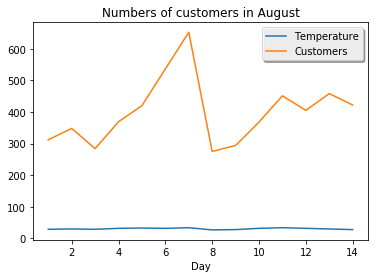

In [10]:
# 折れ線グラフを描く。
plt.plot(col1, col2, label="Temperature")
plt.plot(col1, col3, label="Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.title("Numbers of customers in August")
plt.xlabel("Day")
plt.show()

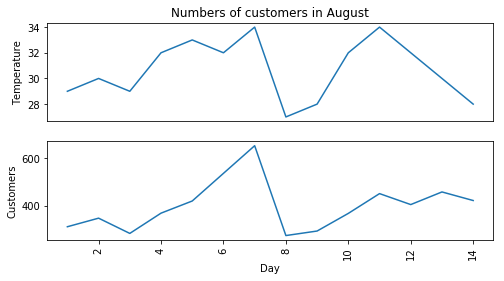

In [11]:
# 折れ線グラフを２つのサブプロットで描く。
plt.figure(figsize=(8, 4))

plt.subplot(2, 1, 1)
plt.plot(col1, col2)
plt.title('Numbers of customers in August')
plt.xticks([])
plt.ylabel('Temperature')

plt.subplot(2, 1, 2)
plt.plot(col1, col3)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Customers')

plt.show()

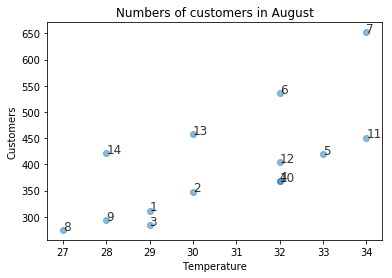

In [12]:
#散布図を描く。
plt.scatter(col2, col3, alpha=0.5)
plt.title("Numbers of customers in August")
plt.xlabel("Temperature")
plt.ylabel("Customers")
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()

In [54]:
# 店舗別８月の平均客数データ（12店舗） をDLし、リストに入れる
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
urllib.request.urlretrieve(url, 'shop_distance.txt')
shop_distance_data = []
for i, line in enumerate(open('shop_distance.txt')):
    if i == 0:
        continue
    c = line.split()
    d = {'id': c[0], 'distance': int(c[1]), 'avg_customers': int(c[2])}
    shop_distance_data.append(d)

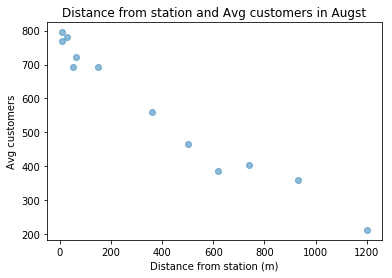

In [55]:
# 散布図を描く
arr_id = [d['id'] for d in shop_distance_data]
arr_distance = [d['distance'] for d in shop_distance_data]
arr_avg_customers = [d['avg_customers'] for d in shop_distance_data]

plt.scatter(arr_distance, arr_avg_customers, alpha = 0.5)
plt.title('Distance from station and Avg customers in Augst')
plt.xlabel('Distance from station (m)')
plt.ylabel('Avg customers')
plt.show()

In [47]:
# 2.1　相関の強さ
# 店舗Aと店舗BのデータをDLし格納する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt'
urllib.request.urlretrieve(url, 'shop_a_b.txt')

# 変数名は気になるが、複雑なデータ構造にしても後が辛いのでサイト側に合わせておく...
col1a = []
col2a = []
col3a = []
col1b = []
col2b = []
col3b = []

for i, line in enumerate(open('shop_a_b.txt')):
    c = line.split()
    if c[3] == 'A':
        col1a.append(c[0])
        col2a.append(int(c[1]))
        col3a.append(int(c[2]))
    elif c[3] == 'B':
        col1b.append(c[0])
        col2b.append(int(c[1]))
        col3b.append(int(c[2]))

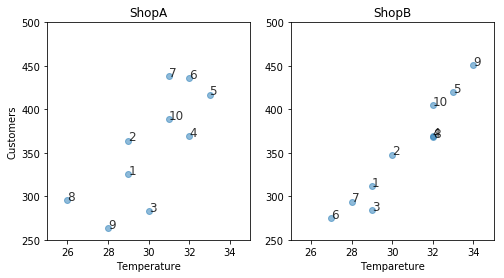

In [48]:
#２つのサブプロットを使って散布図を描く。
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(col2a, col3a, alpha=0.5)
plt.title("ShopA")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.xlim([25, 35])
plt.ylim([250, 500])
for day, x, y in zip(col1a, col2a, col3a):
    plt.text(x, y, day, alpha=0.8, size=12)

plt.subplot(1, 2, 2)
plt.scatter(col2b, col3b, alpha=0.5)
plt.title("ShopB")
plt.xlabel("Tempareture")
plt.xlim([25, 35])
plt.ylim([250, 500])
for day, x, y in zip(col1b, col2b, col3b):
    plt.text(x, y, day, alpha=0.8, size=12)

plt.show()

In [56]:
# 2.2 相関係数を計算する
import numpy as np
import scipy.stats
x = [1, 2, 3]
y = [0, 1, 0.5]
print(
    np.corrcoef(x, y)[0, 1]
)
print(
    scipy.stats.pearsonr(x, y)[0]
)

print(
    scipy.stats.pearsonr(col2a, col3a)[0]
)
print(
    scipy.stats.pearsonr(col2b, col3b)[0]
)
print(
    scipy.stats.pearsonr(arr_distance, arr_avg_customers)[0]
)

0.5
0.5
0.760026458368
0.96353813885
-0.979522118298
